In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import least_squares
from numdifftools import Jacobian
from sklearn.metrics import mean_absolute_percentage_error

In [21]:
alpha = np.random.random()
betta = np.random.random()
print('alpha=' + str(alpha) + ' betta=' + str(betta))

alpha=0.598985128534253 betta=0.8005619005893295


In [27]:
noisy_x = [k/100 for k in range(100)]
noisy_x = np.array(list(noisy_x))
noisy_x[:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

In [28]:
noisy_y = alpha*noisy_x + betta + np.random.normal(0, 0.2, size=len(noisy_x))
noisy_y[:10]

array([0.99625234, 1.28359383, 0.76572588, 1.1344431 , 1.07935035,
       0.94814572, 0.93295078, 0.747904  , 1.09484843, 0.96038638])

In [29]:
def linear(x, a, b):
    return a * x + b

def rational(x, a, b):
    return a / (1 + b * x)

In [30]:
def approximate(func, coef, predictors=noisy_x, target=noisy_y):
    return np.sum((func(predictors, coef[0], coef[1]) - target) ** 2)

### f'(x) = lim (f(x+dx) - f(x))/dx

# Linear

In [31]:
def gradient_descend(a,b, function,step = 1e-3):
    # return function, a, b, iters
    counter = 0
    while True:
        a_new = a - step * ( approximate(function, coef=(a+1e-8, b)) - approximate(function, coef=(a, b))) / 1e-8
        b_new = b - step * ( approximate(function, coef=(a, b+1e-8)) - approximate(function, coef=(a, b))) / 1e-8
        f_new = approximate(function, coef=(a_new, b_new))
        f_old = approximate(function, coef=(a,b))
        if np.abs(f_old - f_new) >= 1e-12:
            counter += 1
            a = a_new
            b = b_new
        else:
            return {'function': f_old,
                    'a': a,
                    'b': b,
                    'iter': counter}

In [32]:
print(gradient_descend(0,0, linear))

{'function': 3.3019243035824757, 'a': 0.527214525813946, 'b': 0.8660262125204099, 'iter': 763}


In [33]:
aprox_min = lambda x: approximate(linear, coef=x)
cg_lin = minimize(aprox_min, x0=(0,0), method='CG')
print(cg_lin)

     fun: 3.3019243035454973
     jac: array([-5.96046448e-08, -5.96046448e-08])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 3
    njev: 10
  status: 0
 success: True
       x: array([0.52721663, 0.86602509])


In [34]:
jacobian_lin = lambda x: Jacobian(aprox_min)(x).ravel()
newton_cg = minimize(aprox_min, x0=[(0,0)], method="Newton-CG", jac=jacobian_lin)
print(newton_cg)

     fun: 3.3019243035454897
     jac: array([-1.10906422e-04,  5.92262018e-05])
 message: 'Optimization terminated successfully.'
    nfev: 5
    nhev: 0
     nit: 4
    njev: 11
  status: 0
 success: True
       x: array([0.52721662, 0.86602511])


In [35]:
def approximate_lm(coef,func, predictors=noisy_x, target=noisy_y):
    return np.sum(((func(predictors, coef[0], coef[1]) - target) ** 2)), 0

In [36]:
lm_l = least_squares(approximate_lm, x0=(0,0),args=(linear,), method='lm')
print(np.sum(lm_l.fun))

3.301924332445307


In [37]:
print(lm_l)

 active_mask: array([0, 0])
        cost: 5.451352148597193
         fun: array([3.30192433, 0.        ])
        grad: array([-0.00235931,  0.00170459])
         jac: array([[-0.00071452,  0.00051624],
       [ 0.        ,  0.        ]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 190
        njev: None
  optimality: 0.0023593072488200632
      status: 2
     success: True
           x: array([0.52715841, 0.8660565 ])


# Rational

In [38]:
print(gradient_descend(0, 0, rational, step=1e-4))

{'function': 3.1789588783514002, 'a': 0.8934425402173929, 'b': -0.38649318460315385, 'iter': 3167}


In [39]:
aprox_min_r = lambda x: approximate(rational, coef=x)
cg_r = minimize(aprox_min_r, x0=(0,0),method='CG')
print(cg_r)

     fun: 3.178958878209099
     jac: array([1.37090683e-06, 3.93390656e-06])
 message: 'Optimization terminated successfully.'
    nfev: 69
     nit: 12
    njev: 23
  status: 0
 success: True
       x: array([ 0.89344076, -0.38649539])


In [40]:
jacobian_r = lambda x: Jacobian(aprox_min_r)(x).ravel()
newton_cg_r = minimize(aprox_min_r, x0=[(0,0)], method="Newton-CG", jac=jacobian_r)
print(newton_cg_r)

     fun: 3.178958878209083
     jac: array([ 4.52510636e-06, -5.83707487e-06])
 message: 'Optimization terminated successfully.'
    nfev: 12
    nhev: 0
     nit: 8
    njev: 38
  status: 0
 success: True
       x: array([ 0.89344073, -0.38649544])


In [41]:
def approximate_lm_r(coef, func, predictors=noisy_x, target=noisy_y):
    return np.sum((func(predictors, coef[0], coef[1]) - target) ** 2), 0


lm_r = least_squares(approximate_lm_r, x0=(0, 0), args=(rational,), method='lm')
print(np.sum(lm_r.fun))

3.1789588951161627


In [42]:
print(lm_r)

 active_mask: array([0, 0])
        cost: 5.052889828419087
         fun: array([3.1789589, 0.       ])
        grad: array([-0.0019521 , -0.00283662])
         jac: array([[-0.00061407, -0.00089231],
       [ 0.        ,  0.        ]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 105
        njev: None
  optimality: 0.002836617913201982
      status: 2
     success: True
           x: array([ 0.89342123, -0.38651989])


# Graphs Linear

FileNotFoundError: [Errno 2] No such file or directory: './Pictures/task3_Linear_approx_grad_d.png'

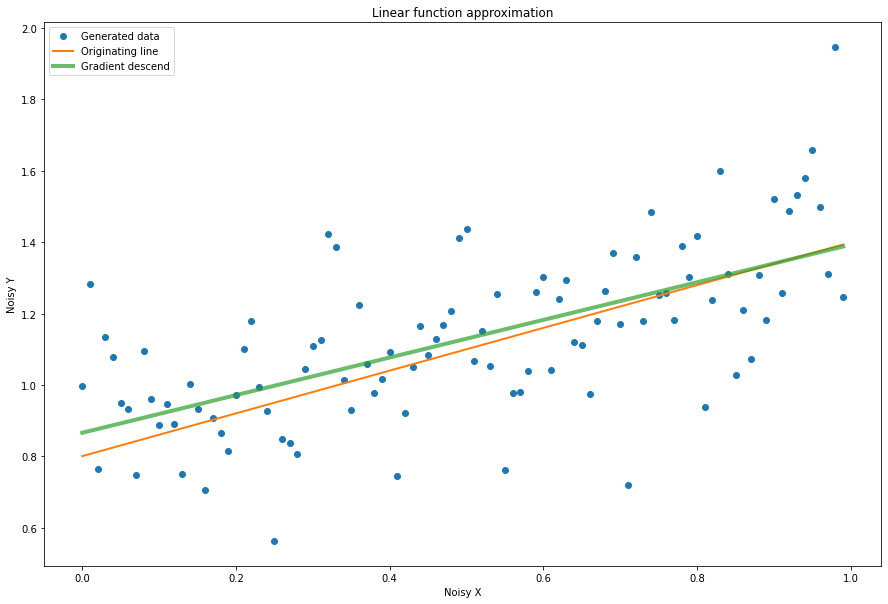

In [43]:
plt.figure(figsize=(15, 10))
plt.plot(noisy_x, noisy_y, 'o', label="Generated data")
plt.plot(noisy_x, linear(noisy_x, a=alpha, b=betta), linewidth=2, label="Originating line")
plt.plot(noisy_x, linear(noisy_x, a=gradient_descend(0, 0, linear)['a'], b=gradient_descend(0, 0, linear)['b']) , linewidth=4, alpha=0.7,
         label="Gradient descend")
plt.title('Linear function approximation')
plt.legend()
plt.xlabel('Noisy X')
plt.ylabel('Noisy Y')
plt.savefig('../Pictures/task3_Linear_approx_grad_d', bbox_inches='tight')
plt.show()

In [44]:
mape_gd_l = mean_absolute_percentage_error(linear(noisy_x, a=alpha, b=betta), linear(noisy_x, a=gradient_descend(0, 0, linear)['a'], b=gradient_descend(0, 0, linear)['b']))
mape_gd_l

0.03147269324618497

FileNotFoundError: [Errno 2] No such file or directory: './Pictures/task3_Linear_approx_CG.png'

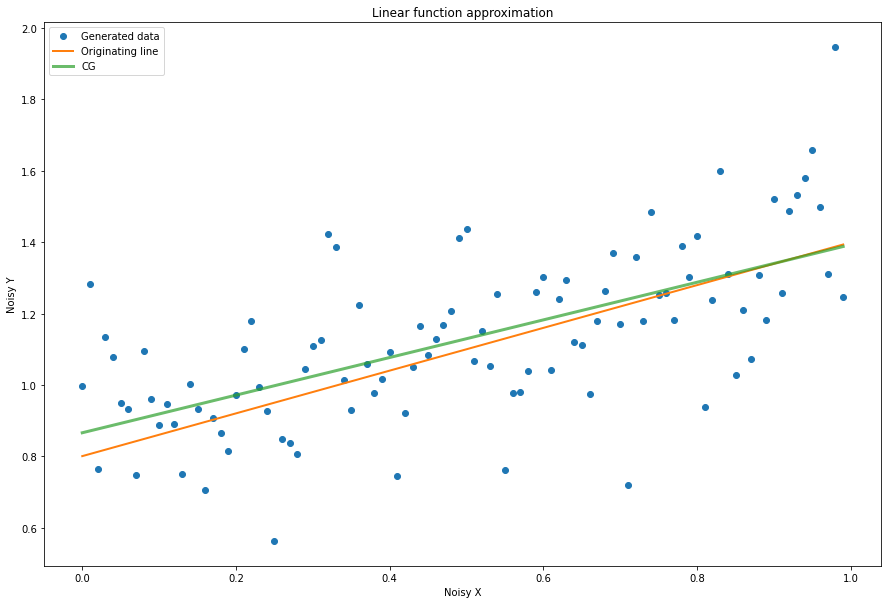

In [45]:
plt.figure(figsize=(15, 10))
plt.plot(noisy_x, noisy_y, 'o', label="Generated data")
plt.plot(noisy_x, linear(noisy_x, a=alpha, b=betta), linewidth=2, label="Originating line")
plt.plot(noisy_x, linear(noisy_x, a=cg_lin.x[0], b=cg_lin.x[1]), linewidth=3, alpha=0.7,
         label="CG")
plt.title('Linear function approximation')
plt.legend()
plt.xlabel('Noisy X')
plt.ylabel('Noisy Y')
plt.savefig('../Pictures/task3_Linear_approx_CG', bbox_inches='tight')
plt.show()

In [46]:
mape_cg_l = mean_absolute_percentage_error(linear(noisy_x, a=alpha, b=betta), linear(noisy_x, a=cg_lin.x[0], b=cg_lin.x[1]))
mape_cg_l

0.03147242676578379

FileNotFoundError: [Errno 2] No such file or directory: './Pictures/task3_Linear_approx_newton.png'

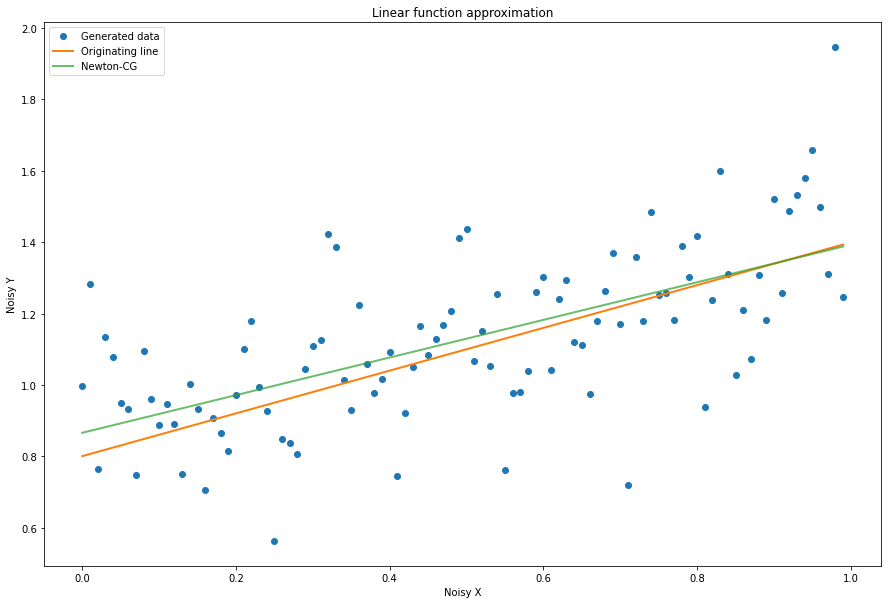

In [47]:
plt.figure(figsize=(15, 10))
plt.plot(noisy_x, noisy_y, 'o', label="Generated data")
plt.plot(noisy_x, linear(noisy_x, a=alpha, b=betta), linewidth=2, label="Originating line")
plt.plot(noisy_x, linear(noisy_x, a=newton_cg.x[0], b=newton_cg.x[1]), linewidth=2, alpha=0.7,
         label="Newton-CG")
plt.title('Linear function approximation')
plt.legend()
plt.xlabel('Noisy X')
plt.ylabel('Noisy Y')
plt.savefig('../Pictures/task3_Linear_approx_newton', bbox_inches='tight')
plt.show()

In [48]:
mape_newton_l = mean_absolute_percentage_error(linear(noisy_x, a=alpha, b=betta), linear(noisy_x, a=newton_cg.x[0], b=newton_cg.x[1]))
mape_newton_l

0.03147243351326195

FileNotFoundError: [Errno 2] No such file or directory: './Pictures/task3_Linear_approx_lm.png'

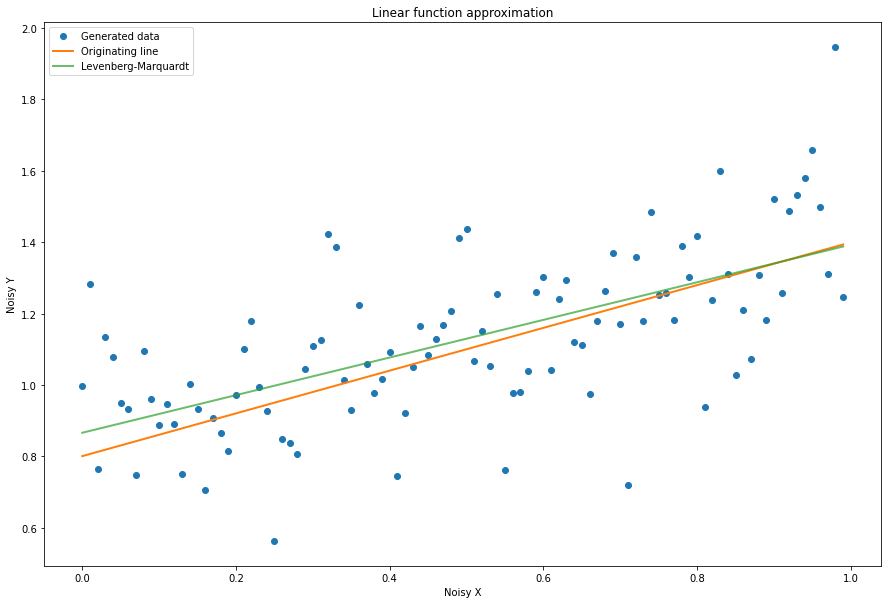

In [49]:
plt.figure(figsize=(15, 10))
plt.plot(noisy_x, noisy_y, 'o', label="Generated data")
plt.plot(noisy_x, linear(noisy_x, a=alpha, b=betta), linewidth=2, label="Originating line")
plt.plot(noisy_x, linear(noisy_x, a=lm_l.x[0], b=lm_l.x[1]), linewidth=2, alpha=0.7,
         label="Levenberg-Marquardt")
plt.title('Linear function approximation')
plt.legend()
plt.xlabel('Noisy X')
plt.ylabel('Noisy Y')
plt.savefig('../Pictures/task3_Linear_approx_lm', bbox_inches='tight')
plt.show()

In [50]:
mape_lm_l = mean_absolute_percentage_error(linear(noisy_x, a=alpha, b=betta), linear(noisy_x, a=lm_l.x[0], b=lm_l.x[1]) )
mape_lm_l

0.03148019525401099

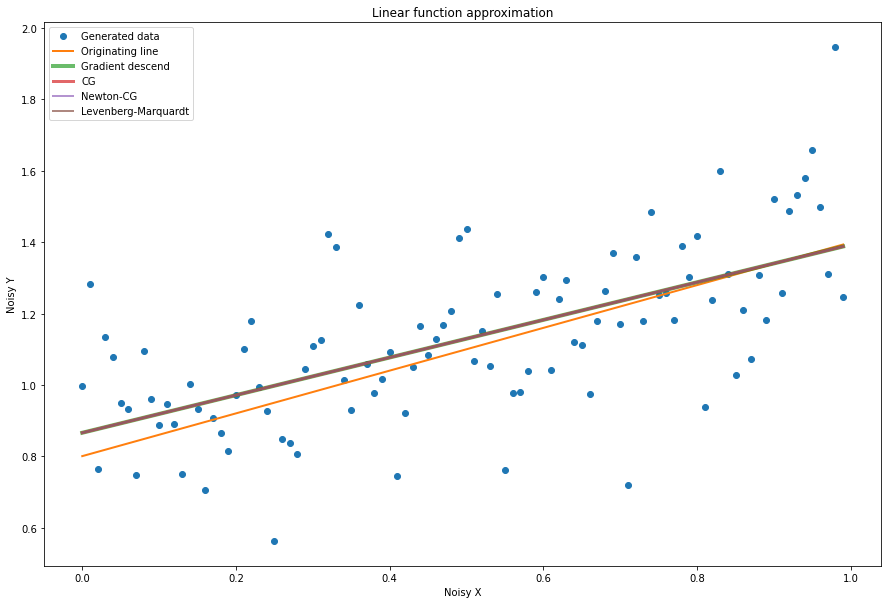

In [53]:
plt.figure(figsize=(15, 10))
plt.plot(noisy_x, noisy_y, 'o', label="Generated data")
plt.plot(noisy_x, linear(noisy_x, a=alpha, b=betta), linewidth=2, label="Originating line")
plt.plot(noisy_x, linear(noisy_x, a=gradient_descend(0, 0, linear)['a'], b=gradient_descend(0, 0, linear)['b']) , linewidth=4, alpha=0.7,
         label="Gradient descend")
plt.plot(noisy_x, linear(noisy_x, a=cg_lin.x[0], b=cg_lin.x[1]), linewidth=3, alpha=0.7,
         label="CG")
plt.plot(noisy_x, linear(noisy_x, a=newton_cg.x[0], b=newton_cg.x[1]), linewidth=2, alpha=0.7,
         label="Newton-CG")
plt.plot(noisy_x, linear(noisy_x, a=lm_l.x[0], b=lm_l.x[1]), linewidth=2, alpha=0.7,
         label="Levenberg-Marquardt")
plt.title('Linear function approximation')
plt.legend()
plt.xlabel('Noisy X')
plt.ylabel('Noisy Y')
plt.savefig('../Pictures/task3_Linear_approx_all', bbox_inches='tight')
plt.show()

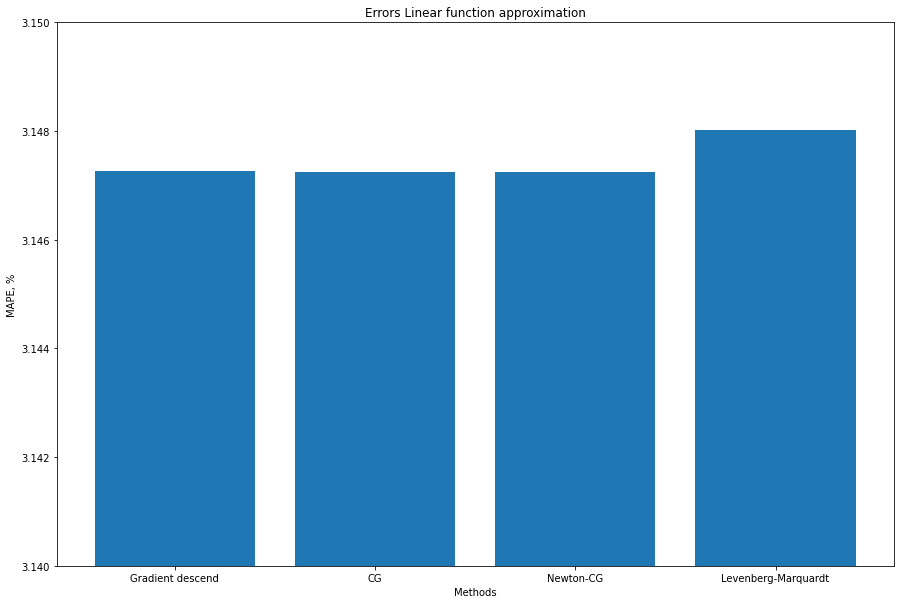

In [61]:
plt.figure(figsize=(15, 10))
x = ["Gradient descend", "CG", "Newton-CG", "Levenberg-Marquardt"]
y = list(map(lambda x: x*100, [mape_gd_l, mape_cg_l, mape_newton_l, mape_lm_l]))
plt.bar(x,y)
plt.title('Errors Linear function approximation')
plt.xlabel('Methods')
plt.ylabel('MAPE, %')
plt.ylim(3.14,3.15)
plt.savefig('../Pictures/task3_Linear_approx_MAPE', bbox_inches='tight')
plt.show()

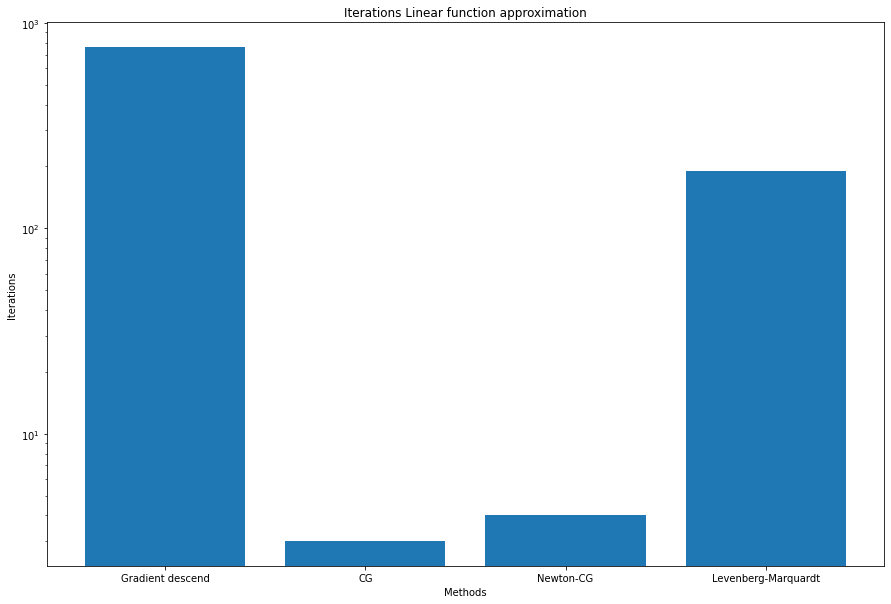

In [63]:
plt.figure(figsize=(15, 10))
x = ["Gradient descend", "CG", "Newton-CG", "Levenberg-Marquardt"]
y = [763, 3, 4, 190]
plt.bar(x,y)
plt.title('Iterations Linear function approximation')
plt.xlabel('Methods')
plt.ylabel('Iterations')
plt.yscale('log')
plt.savefig('../Pictures/task3_Linear_approx_num_iter', bbox_inches='tight')
plt.show()

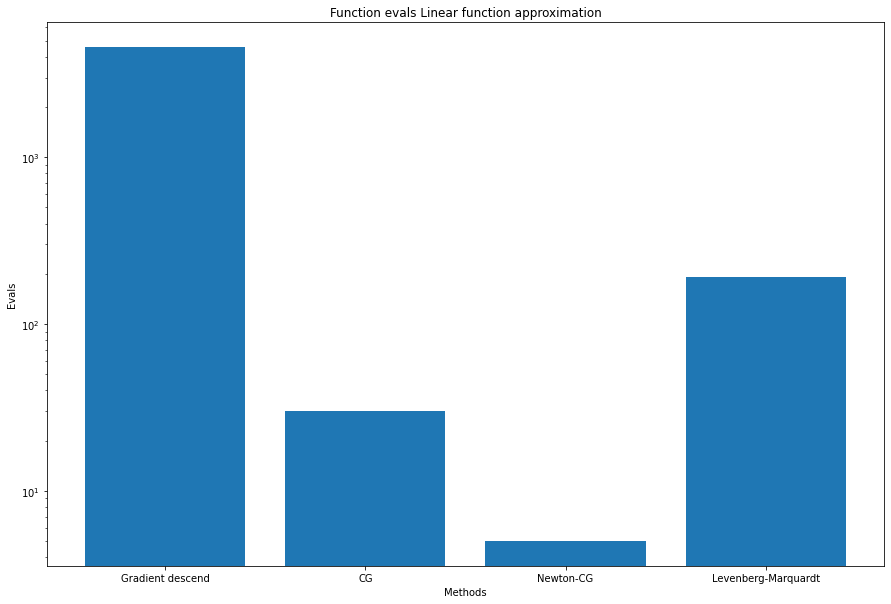

In [83]:
plt.figure(figsize=(15, 10))
x = ["Gradient descend", "CG", "Newton-CG", "Levenberg-Marquardt"]
y = [763*6, 30, 5, 190]
plt.bar(x,y)
plt.title('Function evals Linear function approximation')
plt.xlabel('Methods')
plt.ylabel('Evals')
plt.yscale('log')
plt.savefig('../Pictures/task3_Linear_approx_num_evals', bbox_inches='tight')
plt.show()

# Graphs rational

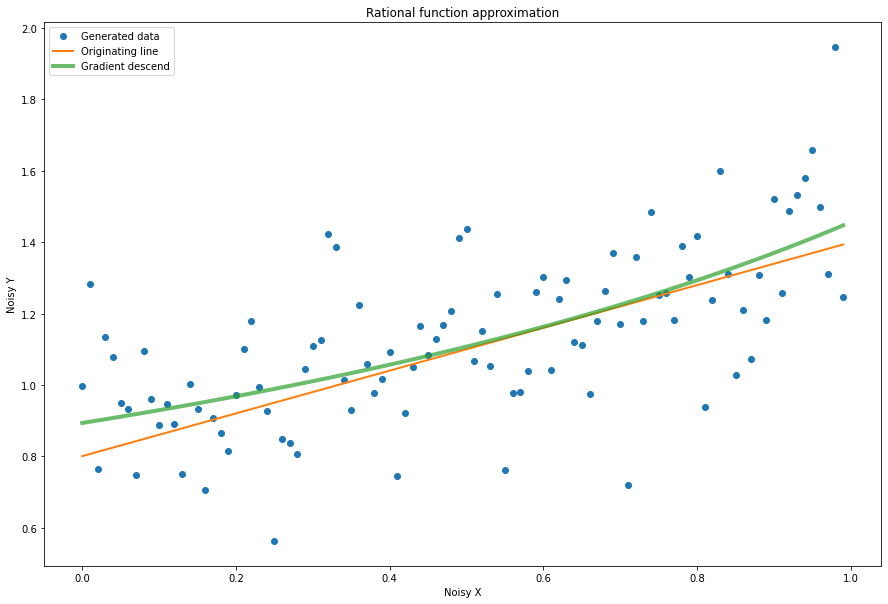

In [65]:
plt.figure(figsize=(15, 10))
plt.plot(noisy_x, noisy_y, 'o', label="Generated data")
plt.plot(noisy_x, linear(noisy_x, a=alpha, b=betta), linewidth=2, label="Originating line")
plt.plot(noisy_x, rational(noisy_x, a=gradient_descend(0, 0, rational)['a'], b=gradient_descend(0, 0, rational)['b']) , linewidth=4, alpha=0.7,
         label="Gradient descend")
plt.title('Rational function approximation')
plt.legend()
plt.xlabel('Noisy X')
plt.ylabel('Noisy Y')
plt.savefig('../Pictures/task3_rational_approx_grad_d', bbox_inches='tight')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './Pictures/task3_rational_approx_CG.png'

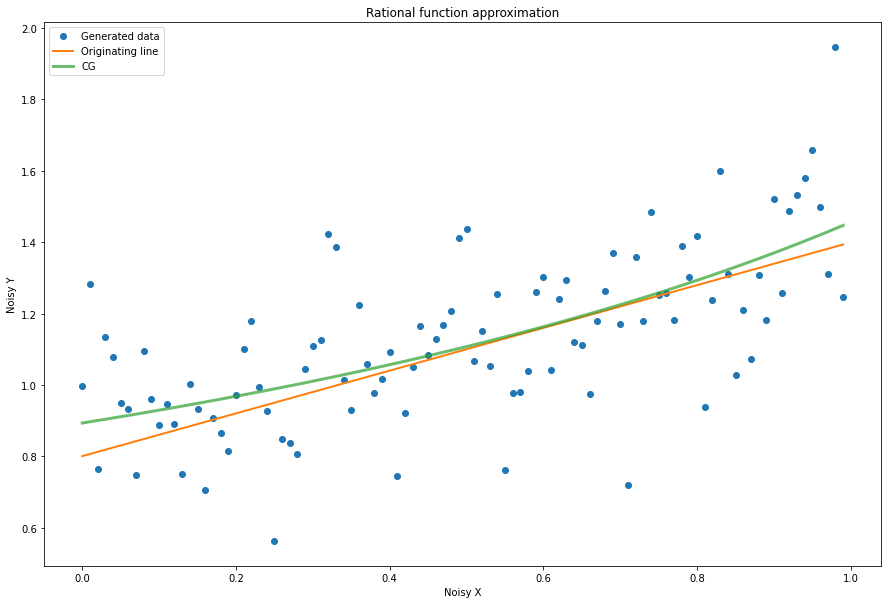

In [66]:
plt.figure(figsize=(15, 10))
plt.plot(noisy_x, noisy_y, 'o', label="Generated data")
plt.plot(noisy_x, linear(noisy_x, a=alpha, b=betta), linewidth=2, label="Originating line")
plt.plot(noisy_x, rational(noisy_x, a=cg_r.x[0], b=cg_r.x[1]), linewidth=3, alpha=0.7,
         label="CG")
plt.title('Rational function approximation')
plt.legend()
plt.xlabel('Noisy X')
plt.ylabel('Noisy Y')
plt.savefig('./Pictures/task3_rational_approx_CG', bbox_inches='tight')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './Pictures/task3_rational_approx_newton.png'

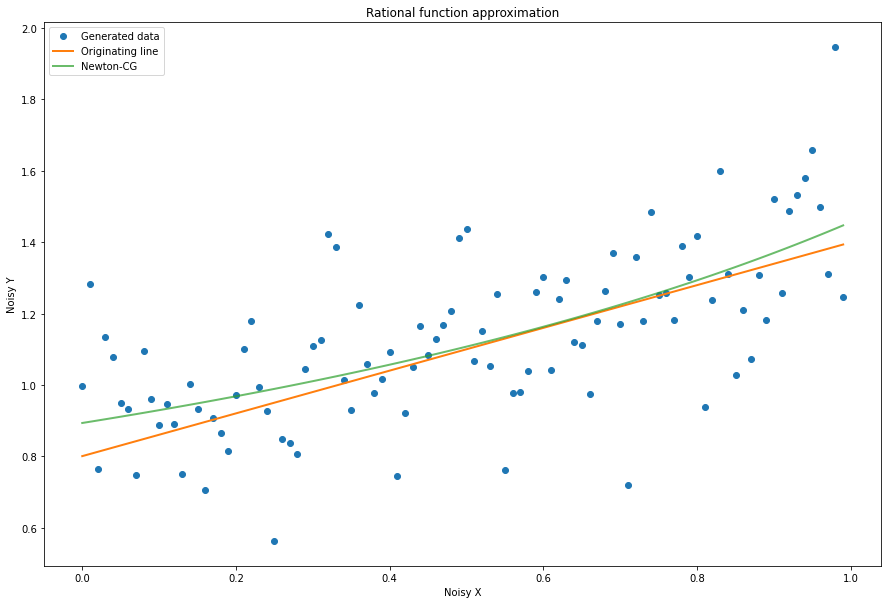

In [67]:
plt.figure(figsize=(15, 10))
plt.plot(noisy_x, noisy_y, 'o', label="Generated data")
plt.plot(noisy_x, linear(noisy_x, a=alpha, b=betta), linewidth=2, label="Originating line")
plt.plot(noisy_x, rational(noisy_x, a=newton_cg_r.x[0], b=newton_cg_r.x[1]), linewidth=2, alpha=0.7,
         label="Newton-CG")
plt.title('Rational function approximation')
plt.legend()
plt.xlabel('Noisy X')
plt.ylabel('Noisy Y')
plt.savefig('./Pictures/task3_rational_approx_newton', bbox_inches='tight')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './Pictures/task3_rational_approx_lm.png'

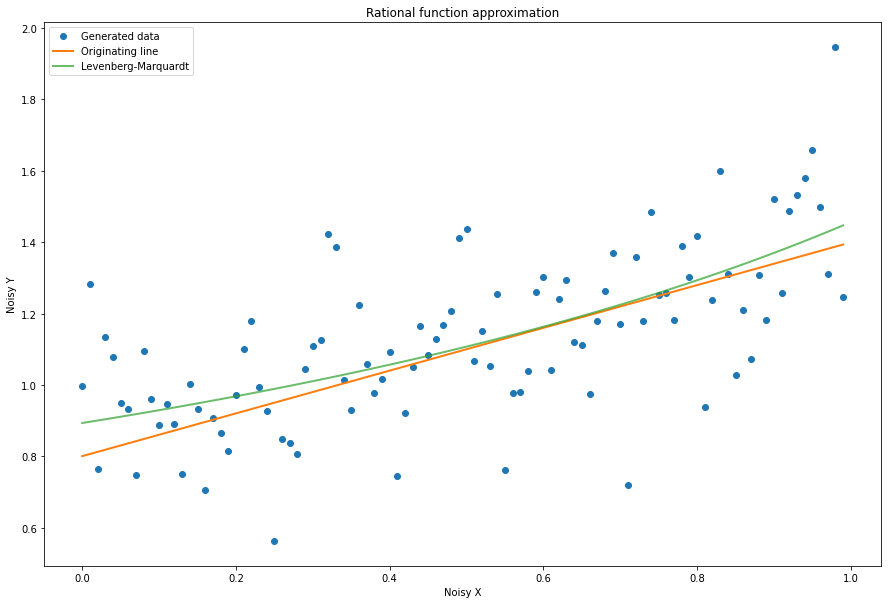

In [68]:
plt.figure(figsize=(15, 10))
plt.plot(noisy_x, noisy_y, 'o', label="Generated data")
plt.plot(noisy_x, linear(noisy_x, a=alpha, b=betta), linewidth=2, label="Originating line")
plt.plot(noisy_x, rational(noisy_x, a=lm_r.x[0], b=lm_r.x[1]), linewidth=2, alpha=0.7,
         label="Levenberg-Marquardt")
plt.title('Rational function approximation')
plt.legend()
plt.xlabel('Noisy X')
plt.ylabel('Noisy Y')
plt.savefig('./Pictures/task3_rational_approx_lm', bbox_inches='tight')
plt.show()

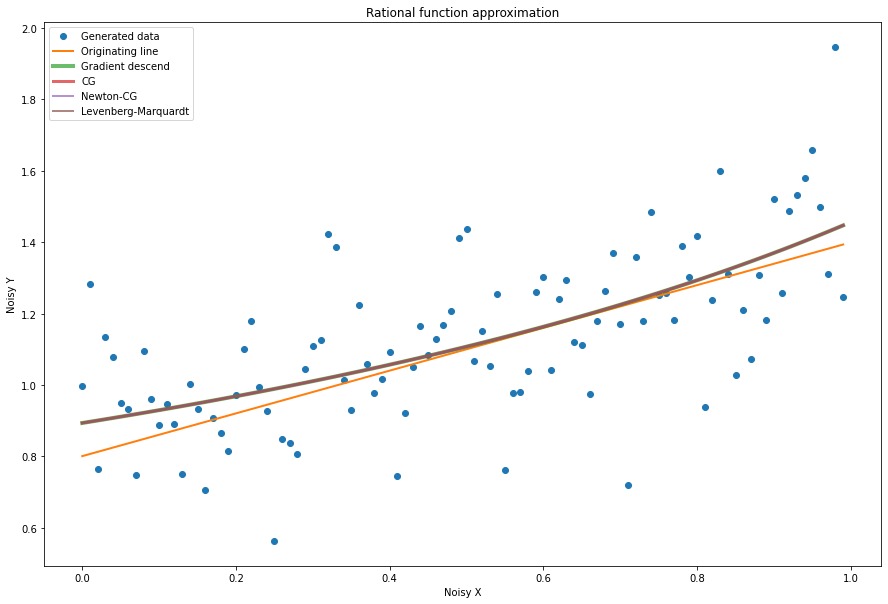

In [69]:
plt.figure(figsize=(15, 10))
plt.plot(noisy_x, noisy_y, 'o', label="Generated data")
plt.plot(noisy_x, linear(noisy_x, a=alpha, b=betta), linewidth=2, label="Originating line")
plt.plot(noisy_x, rational(noisy_x, a=gradient_descend(0, 0, rational, step=1e-4)['a'], b=gradient_descend(0, 0, rational, step=1e-4)['b']) , linewidth=4, alpha=0.7,
         label="Gradient descend")
plt.plot(noisy_x, rational(noisy_x, a=cg_r.x[0], b=cg_r.x[1]), linewidth=3, alpha=0.7,
         label="CG")
plt.plot(noisy_x, rational(noisy_x, a=newton_cg_r.x[0], b=newton_cg_r.x[1]), linewidth=2, alpha=0.7,
         label="Newton-CG")
plt.plot(noisy_x, rational(noisy_x, a=lm_r.x[0], b=lm_r.x[1]), linewidth=2, alpha=0.7,
         label="Levenberg-Marquardt")
plt.title('Rational function approximation')
plt.legend()
plt.xlabel('Noisy X')
plt.ylabel('Noisy Y')
plt.savefig('../Pictures/task3_rational_approx_all', bbox_inches='tight')
plt.show()

In [70]:
mape_gd_r = mean_absolute_percentage_error(linear(noisy_x, a=alpha, b=betta), rational(noisy_x, a=gradient_descend(0, 0, rational, step=1e-4)['a'], b=gradient_descend(0, 0, rational, step=1e-4)['b']))
mape_cg_r = mean_absolute_percentage_error(linear(noisy_x, a=alpha, b=betta), rational(noisy_x, a=cg_r.x[0], b=cg_r.x[1]))
mape_newton_r = mean_absolute_percentage_error(linear(noisy_x, a=alpha, b=betta), rational(noisy_x, a=newton_cg_r.x[0], b=newton_cg_r.x[1]) )
mape_lm_r = mean_absolute_percentage_error(linear(noisy_x, a=alpha, b=betta), rational(noisy_x, a=lm_r.x[0], b=lm_r.x[1]))

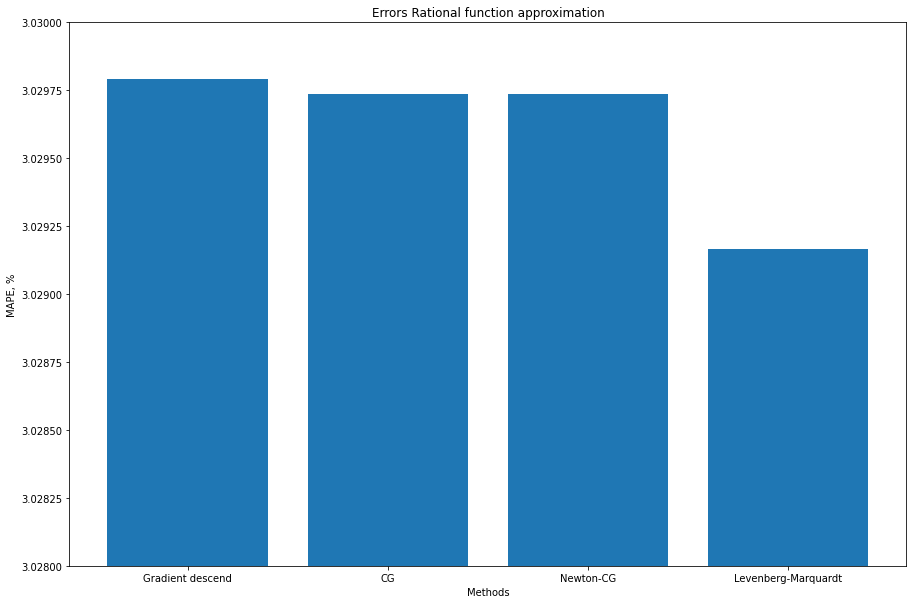

In [78]:
plt.figure(figsize=(15, 10))
x = ["Gradient descend", "CG", "Newton-CG", "Levenberg-Marquardt"]
y = list(map(lambda x: x*100, [mape_gd_r, mape_cg_r, mape_newton_r, mape_lm_r]))
plt.bar(x,y)
plt.title('Errors Rational function approximation')
plt.xlabel('Methods')
plt.ylabel('MAPE, %')
plt.ylim(3.028, 3.03)
plt.savefig('../Pictures/task3_rational_approx_MAPE', bbox_inches='tight')
plt.show()

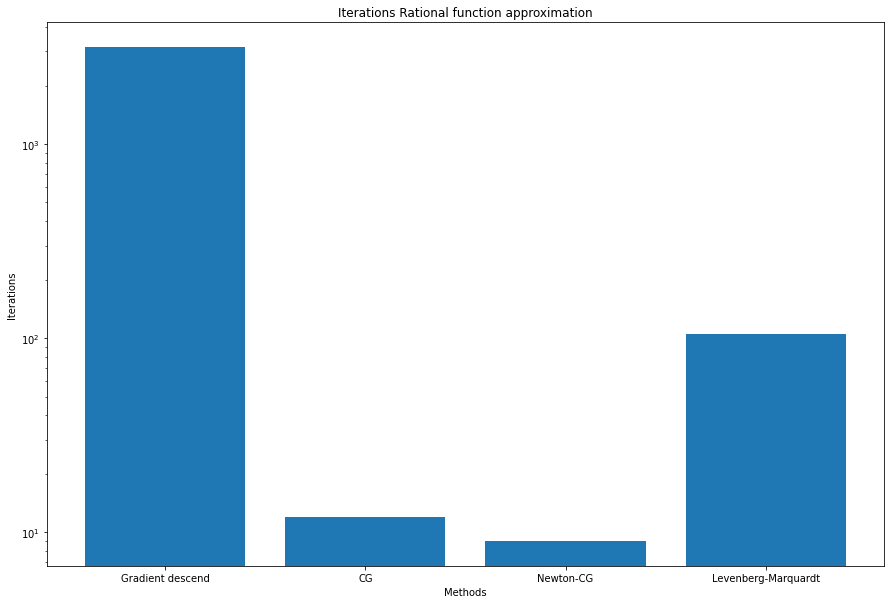

In [79]:
plt.figure(figsize=(15, 10))
x = ["Gradient descend", "CG", "Newton-CG", "Levenberg-Marquardt"]
y = [3167, 12, 9, 105]
plt.bar(x,y)
plt.title('Iterations Rational function approximation')
plt.xlabel('Methods')
plt.ylabel('Iterations')
plt.yscale('log')
plt.savefig('../Pictures/task3_Rational_approx_num_iter', bbox_inches='tight')
plt.show()

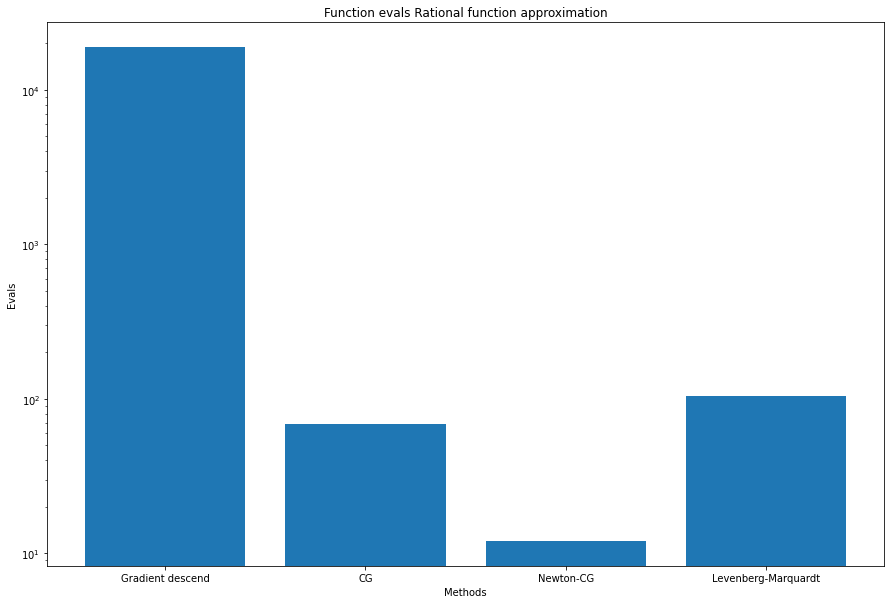

In [81]:
plt.figure(figsize=(15, 10))
x = ["Gradient descend", "CG", "Newton-CG", "Levenberg-Marquardt"]
y = [3167*6, 69, 12, 105]
plt.bar(x,y)
plt.title('Function evals Rational function approximation')
plt.xlabel('Methods')
plt.ylabel('Evals')
plt.yscale('log')
plt.savefig('../Pictures/task3_Rational_approx_num_evals', bbox_inches='tight')
plt.show()